<a href="https://colab.research.google.com/github/VAISHNAVI02210/Oasisinfobyte/blob/main/Housing_prediction_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oasisinfobyte Internship**

TASK 3:  Housing Prediction (linear regression)  Task 3

AUTHOR:  Vaishnavi Kale

BATCH:  JANUARY Phase 1 AICTE OIB-SIP 2025.

**AIM**

The aim of this project is to analyze housing data using data preprocessing, exploratory data analysis (EDA), and machine learning techniques to predict house prices. By applying Linear Regression, the model will help in understanding the key factors affecting house prices and provide insights for better decision-making in the real estate sector.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ashydv_housing_dataset_path = kagglehub.dataset_download('ashydv/housing-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [ ]:
#load dataset
data = pd.read_csv('/kaggle/input/housing-dataset/Housing.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#display first few rows
display(data.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#convert categorial columns to numeric using Label Encoder
categorical_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])


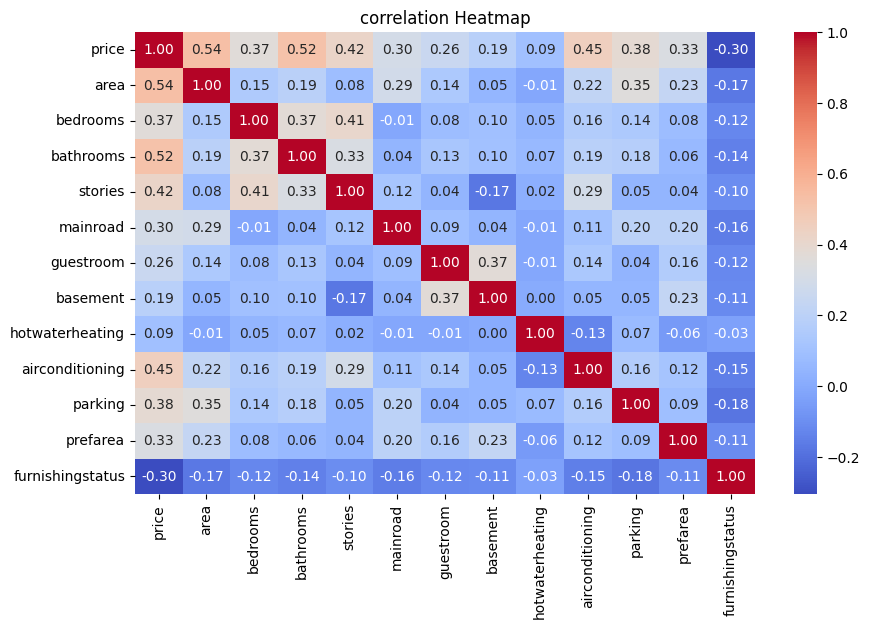

In [ ]:
#check correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("correlation Heatmap")
plt.show()

In [ ]:
#split dataset into traning and testing
x = data.drop(columns=['price'])
y = data['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
#scale numerical feature
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
#train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
#pediction
y_pred = model.predict(x_test_scaled)

In [ ]:
#evaluated model
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 979679.6912959911
MSE: 1771751116594.0413
RMSE: 1331071.4167895128
R2 Score: 0.6494754192267791
